<a href="https://colab.research.google.com/github/alex06733/Bode/blob/main/Bode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

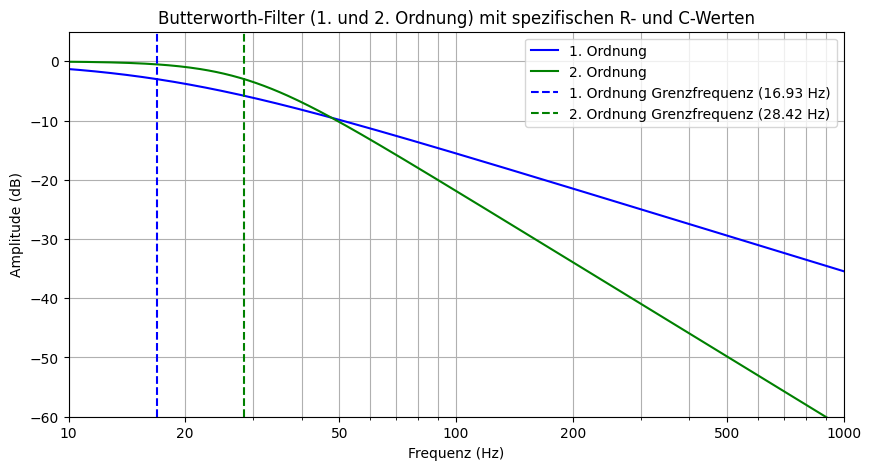

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Widerstand und Kapazität für den Filter erster Ordnung
R1 = 47e3  # in Ohm
C1 = 200e-9  # in Farad
cutoff_freq1 = 1 / (2 * np.pi * R1 * C1)  # Grenzfrequenz in Hz für 1. Ordnung

# Widerstand und Kapazität für den Filter zweiter Ordnung
R2 = 56e3  # in Ohm
C2 = 100e-9  # in Farad
cutoff_freq2 = 1 / (2 * np.pi * R2 * C2)  # Grenzfrequenz in Hz für 2. Ordnung

# Frequenzen für den Plot
frequencies = np.logspace(0.1, 3.5, 500)  # Logarithmische Skalierung bis 1000 Hz

# Filter erster Ordnung (analog)
order1 = 1
b1, a1 = signal.butter(order1, 2 * np.pi * cutoff_freq1, btype='low', analog=True)
w1, h1 = signal.freqs(b1, a1, worN=2 * np.pi * frequencies)

# Filter zweiter Ordnung (analog)
order2 = 2
b2, a2 = signal.butter(order2, 2 * np.pi * cutoff_freq2, btype='low', analog=True)
w2, h2 = signal.freqs(b2, a2, worN=2 * np.pi * frequencies)

# Plot-Einstellungen
plt.figure(figsize=(10, 5))

# Plot für den Filter erster Ordnung
plt.plot(frequencies, 20 * np.log10(np.abs(h1)), 'b', label=f'1. Ordnung')

# Plot für den Filter zweiter Ordnung
plt.plot(frequencies, 20 * np.log10(np.abs(h2)), 'g', label=f'2. Ordnung')

# Grenzfrequenzen markieren
plt.axvline(x=cutoff_freq1, color='blue', linestyle='--', label=f'1. Ordnung Grenzfrequenz ({cutoff_freq1:.2f} Hz)')
plt.axvline(x=cutoff_freq2, color='green', linestyle='--', label=f'2. Ordnung Grenzfrequenz ({cutoff_freq2:.2f} Hz)')

# Achsen und Titel
plt.xscale('log')  # Logarithmische Frequenzachse
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Butterworth-Filter (1. und 2. Ordnung) mit spezifischen R- und C-Werten')
plt.grid(True, which='both', axis='both')
plt.xticks([10, 20, 50, 100, 200, 500, 1000], labels=['10', '20', '50', '100', '200', '500', '1000'])
plt.xlim(10, 1000)
plt.ylim(-60, 5)

# Legende und Plot anzeigen
plt.legend()
plt.show()
